# Install

In [1]:
# Instalar o PySpark e o Java
!pip install pyspark
!apt-get update
!apt-get install -y openjdk-11-jdk

# Configurar variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/lib/python3.11/dist-packages/pyspark"

# Criar a SparkSession diretamente
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Colab PySpark") \
    .getOrCreate()

# Testar com um DataFrame
data = [("Alice", 29), ("Bob", 31), ("Cathy", 24)]
df = spark.createDataFrame(data, ["Name", "Age"])
df.show()


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

# Imports

In [2]:
# SparkSession
from pyspark.sql import SparkSession

# Funções do PySpark SQL
from pyspark.sql.functions import (
    col, sum, when, to_date, lit, month, year, count, dense_rank,
    concat_ws, weekofyear, dayofweek, floor, lag, datediff, avg, max, min, isnan
)

# Window
from pyspark.sql.window import Window

# Tipos de dados
from pyspark.sql.types import StringType, TimestampType

# Funções e alias
from pyspark.sql import functions as F  # F é um alias comum para pyspark.sql.functions

# MLlib (Machine Learning)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Bibliotecas Python
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [3]:

# Criar a SparkSession
spark = SparkSession.builder \
    .appName("Loading Parquet") \
    .config("spark.sql.files.ignoreCorruptFiles", "true") \
    .getOrCreate()

df_historical_orders = spark.read.parquet('/content/historical_orders.parquet')

# August with missing order days
df_august_with_missing_order_days = spark.read.parquet('/content/august_with_missing_order_days.parquet')

# August total sales
df_august_total_sales = spark.read.parquet('/content/august_total_sales.parquet')

# Exemplo de exibição de um DataFrame do PySpark
df_historical_orders.show()

+-----------------+----------+------------------+-----------------+
|       account_id|order_date|transaction_amount|__index_level_0__|
+-----------------+----------+------------------+-----------------+
|BR_09607801000194|2021-08-28|           11011.2|                0|
|BR_09607801000194|2021-08-28|           13764.0|                1|
|BR_09607801000194|2021-08-28|           11011.2|                2|
|BR_09607801000194|2021-08-28|           11011.2|                3|
|BR_09607801000194|2021-08-28|           13764.0|                4|
|BR_09607801000194|2021-08-28|           13764.0|                5|
|   BR_00481601562|2022-06-18|            1017.0|                6|
|   BR_00481601562|2022-06-18|             244.2|                7|
|   BR_00481601562|2022-06-18|              23.0|                8|
|   BR_00481601562|2022-06-18|             42.92|                9|
|   BR_00481601562|2022-06-18|             20.88|               10|
|   BR_00481601562|2022-06-18|              46.0

In [4]:
# Description


print('df_historical_orders:')
print(df_historical_orders.select('transaction_amount').describe().show())

print('\ndf_august_total_sales:')
print(df_august_total_sales.select('total_transaction_amount_august').describe().show())

print('\ndf_august_with_missing_order_days:')
print(df_august_with_missing_order_days.select('transaction_amount').describe().show())

df_historical_orders:
+-------+------------------+
|summary|transaction_amount|
+-------+------------------+
|  count|           8596877|
|   mean| 275.5160665935939|
| stddev|1269.1328439759943|
|    min|            -607.5|
|    max|         418578.92|
+-------+------------------+

None

df_august_total_sales:
+-------+-------------------------------+
|summary|total_transaction_amount_august|
+-------+-------------------------------+
|  count|                          32944|
|   mean|               6413.06834173144|
| stddev|             39539.525757981035|
|    min|                        -9108.0|
|    max|                     2638720.17|
+-------+-------------------------------+

None

df_august_with_missing_order_days:
+-------+------------------+
|summary|transaction_amount|
+-------+------------------+
|  count|            304297|
|   mean|281.33953594676245|
| stddev| 1251.632793567677|
|    min|             -99.0|
|    max|         171325.44|
+-------+------------------+

None


In [5]:
# Data types

print('Schema df_historical_orders:')
df_historical_orders.printSchema()


print('\n\nSchema df_august_with_missing_order_days:')
df_august_with_missing_order_days.printSchema()

print('\n\nSchema df_august_total_sales:')
df_august_total_sales.printSchema()

Schema df_historical_orders:
root
 |-- account_id: string (nullable = true)
 |-- order_date: string (nullable = true)
 |-- transaction_amount: double (nullable = true)
 |-- __index_level_0__: long (nullable = true)



Schema df_august_with_missing_order_days:
root
 |-- account_id: string (nullable = true)
 |-- order_date: string (nullable = true)
 |-- transaction_amount: double (nullable = true)



Schema df_august_total_sales:
root
 |-- account_id: string (nullable = true)
 |-- total_transaction_amount_august: double (nullable = true)



In [6]:
# Adjusting data types


# Ajustando os tipos de dados para 'order_date' (conversão para TimestampType)
df_historical_orders = df_historical_orders.withColumn("order_date", col("order_date").cast(TimestampType()))
df_august_with_missing_order_days = df_august_with_missing_order_days.withColumn("order_date", col("order_date").cast(TimestampType()))

# Ajustando os tipos de dados para 'account_id' (conversão para StringType)
df_historical_orders = df_historical_orders.withColumn("account_id", col("account_id").cast(StringType()))
df_august_with_missing_order_days = df_august_with_missing_order_days.withColumn("account_id", col("account_id").cast(StringType()))
df_august_total_sales = df_august_total_sales.withColumn("account_id", col("account_id").cast(StringType()))



In [7]:
# Data types

print('Schema df_historical_orders:')
df_historical_orders.printSchema()


print('\n\nSchema df_august_with_missing_order_days:')
df_august_with_missing_order_days.printSchema()

print('\n\nSchema df_august_total_sales:')
df_august_total_sales.printSchema()


Schema df_historical_orders:
root
 |-- account_id: string (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- transaction_amount: double (nullable = true)
 |-- __index_level_0__: long (nullable = true)



Schema df_august_with_missing_order_days:
root
 |-- account_id: string (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- transaction_amount: double (nullable = true)



Schema df_august_total_sales:
root
 |-- account_id: string (nullable = true)
 |-- total_transaction_amount_august: double (nullable = true)



In [8]:
# Sort by account_id/order_date

# Ordenar df_historical_orders por 'account_id' e 'order_date'
df_historical_orders = df_historical_orders.orderBy(['account_id', 'order_date'])

# Ordenar df_august_with_missing_order_days por 'account_id' e 'order_date'
df_august_with_missing_order_days = df_august_with_missing_order_days.orderBy(['account_id', 'order_date'])

# Mostrar o resultado do DataFrame df_historical_orders (opcional)
df_august_with_missing_order_days.show()

+-----------------+-------------------+------------------+
|       account_id|         order_date|transaction_amount|
+-----------------+-------------------+------------------+
|   BR_00000343803|               NULL|              NULL|
|   BR_00001415930|               NULL|              NULL|
|   BR_00001760106|               NULL|              NULL|
|   BR_00002485176|2022-08-06 00:00:00|              44.0|
|   BR_00002485176|2022-08-13 00:00:00|              44.0|
|   BR_00002485176|2022-08-13 00:00:00|             24.96|
|   BR_00002485176|2022-08-13 00:00:00|             33.48|
|   BR_00002485176|2022-08-13 00:00:00|             42.04|
|   BR_00002485176|2022-08-13 00:00:00|               0.0|
|   BR_00002485176|2022-08-13 00:00:00|             139.5|
|   BR_00002536340|2022-08-02 00:00:00|             39.96|
|   BR_00002536340|2022-08-02 00:00:00|            2099.0|
|   BR_00002536340|2022-08-02 00:00:00|             199.8|
|   BR_00003056503|               NULL|              NUL

In [ ]:
df_august_with_missing_order_days.show()

+--------------+-------------------+------------------+
|    account_id|         order_date|transaction_amount|
+--------------+-------------------+------------------+
|BR_00002485176|2022-08-06 00:00:00|              44.0|
|BR_00002485176|2022-08-13 00:00:00|              44.0|
|BR_00002485176|2022-08-13 00:00:00|             24.96|
|BR_00002485176|2022-08-13 00:00:00|             33.48|
|BR_00002485176|2022-08-13 00:00:00|             42.04|
|BR_00002485176|2022-08-13 00:00:00|             139.5|
|BR_00002536340|2022-08-02 00:00:00|             39.96|
|BR_00002536340|2022-08-02 00:00:00|            2099.0|
|BR_00002536340|2022-08-02 00:00:00|             199.8|
|BR_00009144366|2022-08-06 00:00:00|             114.9|
|BR_00014989670|2022-08-03 00:00:00|           2205.44|
|BR_00014989670|2022-08-03 00:00:00|            268.37|
|BR_00014989670|2022-08-03 00:00:00|            148.09|
|BR_00014989670|2022-08-03 00:00:00|            140.33|
|BR_00014989670|2022-08-03 00:00:00|           1

# Initial data exploring

In [9]:

# Calcular o intervalo
interval_days = df_historical_orders.select(
    datediff(max("order_date"), min("order_date")).alias("interval_days")
).collect()[0][0]

print(f"Intervalo de dias: {interval_days}")

Intervalo de dias: 575


In [10]:
# Qtde de account's únicos em august_with_missing_order_days


# Contar o número de valores únicos na coluna 'account_id'
unique_account_ids = df_august_with_missing_order_days.select("account_id").distinct().count()

print(f"Número de valores únicos em 'account_id': {unique_account_ids}")

Número de valores únicos em 'account_id': 32944


In [11]:
# Missing


# Contar valores ausentes (NaN ou Null) para cada coluna
missing_values = df_historical_orders.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in df_historical_orders.columns
    ]
)

# Mostrar os resultados
missing_values.show()

+----------+----------+------------------+-----------------+
|account_id|order_date|transaction_amount|__index_level_0__|
+----------+----------+------------------+-----------------+
|         0|         0|                 0|                0|
+----------+----------+------------------+-----------------+



In [ ]:
df_historical_orders.printSchema()

root
 |-- account_id: string (nullable = true)
 |-- order_date: timestamp (nullable = true)
 |-- transaction_amount: double (nullable = true)
 |-- __index_level_0__: long (nullable = true)



In [ ]:
# Dado duplicado?

#date_to_filter = to_date(lit("2021-01-02")) # Usando lit para melhor performance

df_historical_orders.filter(
    (df_historical_orders['account_id'] == 'BR_15103571000129') &
    (df_historical_orders['order_date'] == "2021-01-02") &
    (df_historical_orders['transaction_amount'] == 62.82)).show()

+-----------------+-------------------+------------------+-----------------+
|       account_id|         order_date|transaction_amount|__index_level_0__|
+-----------------+-------------------+------------------+-----------------+
|BR_15103571000129|2021-01-02 00:00:00|             62.82|          2265360|
|BR_15103571000129|2021-01-02 00:00:00|             62.82|          2265361|
+-----------------+-------------------+------------------+-----------------+



In [12]:
# Removendo duplicados

# Remove as linhas duplicadas
df_historical_orders = df_historical_orders.dropDuplicates().orderBy(['account_id', 'order_date'])

print("DataFrame após remover duplicadas:")
df_historical_orders.show()

DataFrame após remover duplicadas:
+--------------+-------------------+------------------+-----------------+
|    account_id|         order_date|transaction_amount|__index_level_0__|
+--------------+-------------------+------------------+-----------------+
|BR_00000343803|2021-01-07 00:00:00|             30.48|          5345733|
|BR_00000343803|2021-01-07 00:00:00|             222.4|          5345744|
|BR_00000343803|2021-01-14 00:00:00|             49.52|          3601147|
|BR_00000343803|2021-01-21 00:00:00|             62.76|          5332366|
|BR_00000343803|2021-01-21 00:00:00|             111.2|          5332376|
|BR_00000343803|2021-01-30 00:00:00|             222.4|          1923943|
|BR_00000343803|2021-01-30 00:00:00|            116.16|          1923941|
|BR_00000343803|2021-02-11 00:00:00|             111.2|          3619221|
|BR_00000343803|2021-02-18 00:00:00|             222.4|          1910239|
|BR_00000343803|2021-02-18 00:00:00|             111.2|          1910235|
|BR

# EDA

## Enriquecendo os dados

In [13]:
df_historical_orders.show(10)

+--------------+-------------------+------------------+-----------------+
|    account_id|         order_date|transaction_amount|__index_level_0__|
+--------------+-------------------+------------------+-----------------+
|BR_00000343803|2021-01-07 00:00:00|             30.48|          5345733|
|BR_00000343803|2021-01-07 00:00:00|             222.4|          5345744|
|BR_00000343803|2021-01-14 00:00:00|             49.52|          3601147|
|BR_00000343803|2021-01-21 00:00:00|             62.76|          5332366|
|BR_00000343803|2021-01-21 00:00:00|             111.2|          5332376|
|BR_00000343803|2021-01-30 00:00:00|             222.4|          1923943|
|BR_00000343803|2021-01-30 00:00:00|            116.16|          1923941|
|BR_00000343803|2021-02-11 00:00:00|             111.2|          3619221|
|BR_00000343803|2021-02-18 00:00:00|             222.4|          1910239|
|BR_00000343803|2021-02-18 00:00:00|             111.2|          1910235|
+--------------+-------------------+--

In [14]:
# =================== Criando o campo target ===============================


# Criar uma coluna com o mês e ano (string para usar no groupBy)
df_historical_orders = df_historical_orders.withColumn(
    "month_year", concat_ws("-", year(col("order_date")), month(col("order_date")))
)

# Remover duplicatas (mantendo apenas um registro por dia)
df_unique = df_historical_orders.select("account_id", "month_year", "order_date").distinct()

# Calcular o número total de dias únicos e rankear os dias
window_spec = Window.partitionBy("account_id", "month_year").orderBy("order_date")
window_spec_count = Window.partitionBy("account_id", "month_year")

df_unique = df_unique.withColumn(
    "total_days", count("*").over(window_spec_count)
).withColumn(
    "day_rank", dense_rank().over(window_spec)
).withColumn(
    "days_of_orders", col("total_days") - col("day_rank") + 1
).drop("total_days", "day_rank")

# Combinar com o DataFrame original
df_historical_orders = df_historical_orders.join(df_unique, on=["account_id", "order_date", "month_year"], how="left")

# Remover a coluna auxiliar 'month_year'
df_historical_orders = df_historical_orders.drop("month_year")

# Ordenar (opcional, já está ordenado pelo join e window)
df_historical_orders = df_historical_orders.orderBy("account_id", "order_date")

df_historical_orders.show()

+--------------+-------------------+------------------+-----------------+--------------+
|    account_id|         order_date|transaction_amount|__index_level_0__|days_of_orders|
+--------------+-------------------+------------------+-----------------+--------------+
|BR_00000343803|2021-01-07 00:00:00|             30.48|          5345733|             4|
|BR_00000343803|2021-01-07 00:00:00|             222.4|          5345744|             4|
|BR_00000343803|2021-01-14 00:00:00|             49.52|          3601147|             3|
|BR_00000343803|2021-01-21 00:00:00|             111.2|          5332376|             2|
|BR_00000343803|2021-01-21 00:00:00|             62.76|          5332366|             2|
|BR_00000343803|2021-01-30 00:00:00|            116.16|          1923941|             1|
|BR_00000343803|2021-01-30 00:00:00|             222.4|          1923943|             1|
|BR_00000343803|2021-02-11 00:00:00|             111.2|          3619221|             2|
|BR_00000343803|2021-

In [ ]:
# Printar "account_id" únicos

unique_account_ids = df_historical_orders.select("account_id").distinct().rdd.flatMap(lambda x: x).collect()

print(unique_account_ids)

['BR_81130643549', 'BR_28144493893', 'BR_01588299000100', 'BR_01680890760', 'BR_02070802000101', 'BR_02639177893', 'BR_02808482183', 'BR_03696831611', 'BR_04346167000160', 'BR_04611438000167', 'BR_04876435000236', 'BR_05058887428', 'BR_07261281000185', 'BR_07590380000100', 'BR_07818481000196', 'BR_08413693000156', 'BR_08508550472', 'BR_09199924000133', 'BR_09629006000105', 'BR_12303616000200', 'BR_12449874000100', 'BR_14581477549', 'BR_18571496000119', 'BR_25289145000266', 'BR_27190455000173', 'BR_27836215000101', 'BR_28156980000135', 'BR_29172861649', 'BR_29371188000166', 'BR_29589919000144', 'BR_29824541000116', 'BR_29897561000117', 'BR_32900312000148', 'BR_34699572000122', 'BR_36122318000192', 'BR_36696463000187', 'BR_37490859000136', 'BR_40254453368', 'BR_41830744000110', 'BR_44127979453', 'BR_45665361000195', 'BR_48473324668', 'BR_55761372649', 'BR_56870140634', 'BR_64130630253', 'BR_66262291415', 'BR_73091839753', 'BR_76201678204', 'BR_76785823749', 'BR_81852436000100', 'BR_83350

In [ ]:
# Check para outros 'account_id'


# Filtra o DataFrame
print("DataFrame filtrado:")
df_historical_orders.filter("account_id == 'BR_00001415930'").show()

DataFrame filtrado:
+--------------+----------+------------------+-----------------+--------------+
|    account_id|order_date|transaction_amount|__index_level_0__|days_of_orders|
+--------------+----------+------------------+-----------------+--------------+
|BR_00001415930|2022-05-06|             88.32|          9314121|             2|
|BR_00001415930|2022-05-06|             88.32|          9314119|             2|
|BR_00001415930|2022-05-06|              13.8|          8258955|             2|
|BR_00001415930|2022-05-06|              13.8|          8258976|             2|
|BR_00001415930|2022-05-27|             40.78|           240349|             1|
|BR_00001415930|2022-05-27|            132.48|           240343|             1|
|BR_00001415930|2022-05-27|             43.93|           240353|             1|
|BR_00001415930|2022-05-27|             44.15|          4661386|             1|
|BR_00001415930|2022-06-03|            129.18|           249081|             1|
|BR_00001415930|2022

In [ ]:
# =================== Enriquecendo o dado ===========================

In [15]:
# ***************** features temporais ****************

# Week of year
df_historical_orders = df_historical_orders.withColumn('week_of_year', weekofyear(col('order_date')))

# Month of year
df_historical_orders = df_historical_orders.withColumn('month_of_year', month(col('order_date')))

# Week of month
df_historical_orders = df_historical_orders.withColumn('week_of_month', floor(((dayofweek(col('order_date')) + lit(5)) % lit(7) + lit(1)) / lit(7)) + lit(1))

# Is weekend?
df_historical_orders = df_historical_orders.withColumn('is_weekend', (dayofweek(col('order_date')) < 5).cast("int"))

# Exibe o DataFrame com as novas colunas
df_historical_orders.show()

+--------------+-------------------+------------------+-----------------+--------------+------------+-------------+-------------+----------+
|    account_id|         order_date|transaction_amount|__index_level_0__|days_of_orders|week_of_year|month_of_year|week_of_month|is_weekend|
+--------------+-------------------+------------------+-----------------+--------------+------------+-------------+-------------+----------+
|BR_00000343803|2021-01-07 00:00:00|             30.48|          5345733|             4|           1|            1|            1|         0|
|BR_00000343803|2021-01-07 00:00:00|             222.4|          5345744|             4|           1|            1|            1|         0|
|BR_00000343803|2021-01-14 00:00:00|             49.52|          3601147|             3|           2|            1|            1|         0|
|BR_00000343803|2021-01-21 00:00:00|             111.2|          5332376|             2|           3|            1|            1|         0|
|BR_000003438

In [16]:
# ***************** features 'account_id' ****************


# days_since_last_purchase <--------------------------


# Criar uma janela para calcular a data da última compra
window_spec = Window.partitionBy("account_id").orderBy("order_date")

# Calcular a data da última compra
df_historical_orders = df_historical_orders.withColumn(
    "prev_order_date", lag("order_date").over(window_spec)
)

# Calcular a diferença em dias entre a data atual e a última compra
df_historical_orders = df_historical_orders.withColumn(
    "days_since_last_purchase",
    datediff(col("order_date"), col("prev_order_date"))
)


# mean_transaction_amount_previous_dates <--------------------------

# Criar uma janela para calcular a média das transações anteriores
window_spec_avg = Window.partitionBy("account_id").orderBy("order_date").rowsBetween(Window.unboundedPreceding, -1)

# Calcular a média das transações anteriores
df_historical_orders = df_historical_orders.withColumn(
    "mean_transaction_amount_previous_dates",
    avg("transaction_amount").over(window_spec_avg)
)

# Remover a coluna auxiliar 'prev_order_date'
df_historical_orders = df_historical_orders.drop("prev_order_date")

# Reorganizar as colunas para que 'days_since_last_purchase' venha antes de 'mean_transaction_amount_previous_dates'
columns_order = [
    "account_id", "order_date", "transaction_amount", "__index_level_0__",
    "days_of_orders", "week_of_year", "month_of_year", "week_of_month", "is_weekend",
    "days_since_last_purchase", "mean_transaction_amount_previous_dates"
]
df_historical_orders = df_historical_orders.select(*[col for col in columns_order if col in df_historical_orders.columns])

# Mostrar o resultado
df_historical_orders.show()

+--------------+-------------------+------------------+-----------------+--------------+------------+-------------+-------------+----------+------------------------+--------------------------------------+
|    account_id|         order_date|transaction_amount|__index_level_0__|days_of_orders|week_of_year|month_of_year|week_of_month|is_weekend|days_since_last_purchase|mean_transaction_amount_previous_dates|
+--------------+-------------------+------------------+-----------------+--------------+------------+-------------+-------------+----------+------------------------+--------------------------------------+
|BR_00000343803|2021-01-07 00:00:00|             30.48|          5345733|             4|           1|            1|            1|         0|                    NULL|                                  NULL|
|BR_00000343803|2021-01-07 00:00:00|             222.4|          5345744|             4|           1|            1|            1|         0|                       0|               

In [17]:

# Dataframe p/ machine learning


# Função para calcular a semana do mês
def calculate_week_of_month(df):
    # Extrair o dia do mês e calcular a semana do mês
    df = df.withColumn("day_of_month", F.dayofmonth("order_date"))
    df = df.withColumn("week_of_month", ((F.col("day_of_month") - 1) / 7).cast("int") + 1)
    return df.drop("day_of_month")  # Remover a coluna auxiliar

# Aplicar a função para calcular a semana do mês
df_historical_orders = calculate_week_of_month(df_historical_orders)

# Agrupamento e agregação
df = df_historical_orders.groupBy("account_id", "order_date").agg(
    # Coletar o 'days_since_last_purchase' (máximo do grupo, substituindo NaN por null)
    F.max(F.when(F.isnan(F.col("days_since_last_purchase")), F.lit(None))
          .otherwise(F.col("days_since_last_purchase"))).alias("days_since_last_purchase"),

    # Coletar o 'days_of_orders' (primeiro valor do grupo)
    F.first("days_of_orders").alias("days_of_orders"),

    # Coletar o 'mean_transaction_amount_previous_dates' (último valor do grupo)
    F.last("mean_transaction_amount_previous_dates").alias("mean_transaction_amount_previous_dates"),

    # Calcular o 'mean_transaction_amount_current_dates' (média do grupo)
    F.mean("transaction_amount").alias("mean_transaction_amount_current_dates"),

    # Coletar o 'week_of_year' (primeiro valor do grupo)
    F.first("week_of_year").alias("week_of_year"),

    # Coletar o 'month_of_year' (primeiro valor do grupo)
    F.first("month_of_year").alias("month_of_year"),

    # Coletar o 'week_of_month' (já calculado dinamicamente)
    F.first("week_of_month").alias("week_of_month"),

    # Coletar o 'is_weekend' (primeiro valor do grupo)
    F.first("is_weekend").alias("is_weekend")
)

# Remover linhas onde 'days_since_last_purchase' é igual a 0
df = df.filter(F.col("days_since_last_purchase") != 0)

# Remover linhas com valores nulos (equivalente ao .dropna() no Pandas)
df = df.na.drop()

# Exportar o DataFrame como arquivo Parquet
df.repartition(1).write.parquet("/content/X_train_pyspark.parquet", mode="overwrite")

# Exibir o resultado
df.show()

+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+
|    account_id|         order_date|days_since_last_purchase|days_of_orders|mean_transaction_amount_previous_dates|mean_transaction_amount_current_dates|week_of_year|month_of_year|week_of_month|is_weekend|
+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+
|BR_00000343803|2021-01-14 00:00:00|                       7|             3|                                126.44|                                49.52|           2|            1|            2|         0|
|BR_00000343803|2021-01-21 00:00:00|                       7|             2|                    103.39999999999999|                                86.98|           3|          

In [18]:
num_rows = df.count()          # Conta o número de linhas
num_cols = len(df.columns)     # Conta o número de colunas

print(f"Dimensões do DataFrame: ({num_rows}, {num_cols})")

Dimensões do DataFrame: (1380485, 10)


## Explorando os dados

### Variáveis numéricas X Target

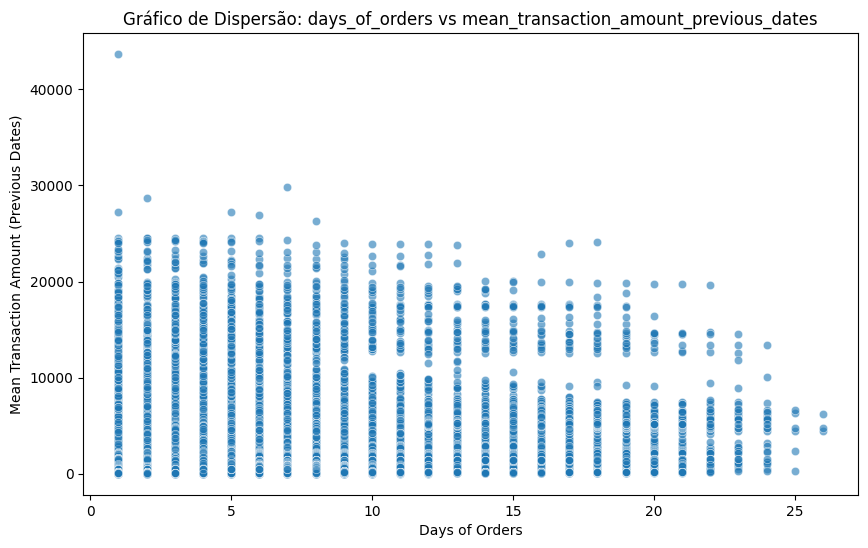

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
sns.scatterplot(
    x='days_of_orders',
    y='mean_transaction_amount_previous_dates',
    data=df.toPandas(),
    alpha=0.6  # Transparência dos pontos
)

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão: days_of_orders vs mean_transaction_amount_previous_dates')
plt.xlabel('Days of Orders')
plt.ylabel('Mean Transaction Amount (Previous Dates)')

# Mostrar o gráfico
plt.show()

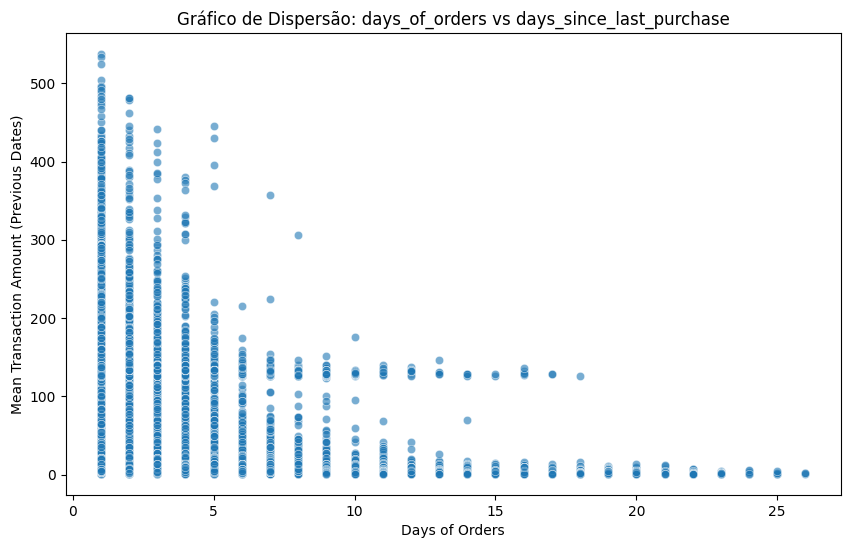

In [ ]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
sns.scatterplot(
    x='days_of_orders',
    y='days_since_last_purchase',
    data=df.toPandas(),
    alpha=0.6  # Transparência dos pontos
)

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão: days_of_orders vs days_since_last_purchase')
plt.xlabel('Days of Orders')
plt.ylabel('Mean Transaction Amount (Previous Dates)')

# Mostrar o gráfico
plt.show()

### Compras X Períodos do ano

In [ ]:
# =========== Finais de semana ===============

# Nos finais de semana existem mais registros de transações do que nos dias de semana

df.groupBy("is_weekend").agg(
    F.count("account_id").alias("account_id_count")  # Contar o número de account_id
).show(3)

+----------+----------------+
|is_weekend|account_id_count|
+----------+----------------+
|         1|          743708|
|         0|          616316|
+----------+----------------+



In [19]:
# Compras meses do ano

(df.groupby("month_of_year")
.agg(F.count("order_date").alias("order_date_count"))
.orderBy("order_date_count", ascending=False).show())

+-------------+----------------+
|month_of_year|order_date_count|
+-------------+----------------+
|            3|          170491|
|            7|          161472|
|            6|          158911|
|            5|          157978|
|            4|          156764|
|            2|          111993|
|            1|          101679|
|           10|           94060|
|           12|           68510|
|            9|           66726|
|           11|           66259|
|            8|           65642|
+-------------+----------------+



### Clientes

In [ ]:
# Clientes mais frequentes

df.groupBy("account_id").agg(
    F.count("order_date").alias("order_date_count")  # Contar o número de account_id
).orderBy("order_date_count", ascending=False).show(10)

+-----------------+----------------+
|       account_id|order_date_count|
+-----------------+----------------+
|BR_27873143000164|             409|
|BR_05757740000190|             404|
|BR_09180544000238|             378|
|BR_30179280000108|             374|
|   BR_35466456268|             364|
|BR_08827954000184|             350|
|BR_33142780000163|             350|
|BR_22354196000155|             334|
|BR_10661327000168|             324|
|BR_33354580000174|             322|
+-----------------+----------------+
only showing top 10 rows



In [ ]:
# Clientes menos frequentes

df.groupBy("account_id").agg(
    F.count("order_date").alias("order_date_count")  # Contar o número de account_id
).orderBy("order_date_count").show(10)

+-----------------+----------------+
|       account_id|order_date_count|
+-----------------+----------------+
|BR_29643403000130|               1|
|BR_05631752000174|               1|
|BR_44297362000161|               1|
|BR_17796312000156|               1|
|   BR_01690904429|               1|
|   BR_07896861631|               1|
|   BR_05570781560|               1|
|   BR_10533536693|               1|
|   BR_09168335695|               1|
|   BR_07854299722|               1|
+-----------------+----------------+
only showing top 10 rows



### Recência compras

In [ ]:
# Contagem de compras segmentado pela recencia (em dias desde a última compra)

(df.groupby("days_since_last_purchase")
.agg(F.count("order_date").alias("order_date_count"))
.orderBy("order_date_count", ascending=False).show())

+------------------------+----------------+
|days_since_last_purchase|order_date_count|
+------------------------+----------------+
|                       7|          415793|
|                       3|          145042|
|                       4|          139660|
|                      14|          106180|
|                       2|           69915|
|                       1|           67251|
|                       5|           52204|
|                       6|           51965|
|                      10|           35778|
|                       8|           34896|
|                      21|           33239|
|                      11|           26555|
|                       9|           22857|
|                      28|           14655|
|                      13|           13293|
|                      12|           12429|
|                      15|           10513|
|                      17|           10116|
|                      18|            8013|
|                      35|      

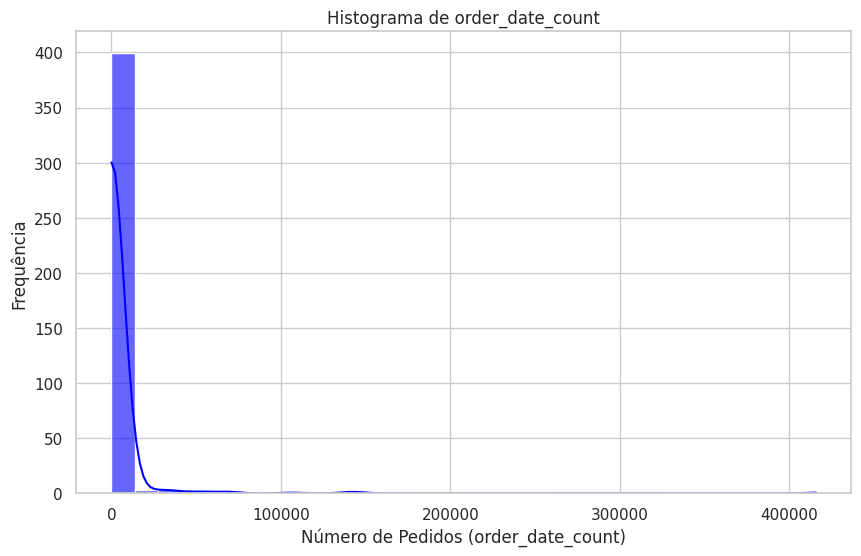

In [ ]:
df_recencia = (df.groupby("days_since_last_purchase")
.agg(F.count("order_date").alias("order_date_count"))
.orderBy("order_date_count", ascending=False))


# Converter o DataFrame do PySpark para Pandas
df_recencia_pandas = df_recencia.toPandas()

# Configurar o estilo do gráfico (opcional)
sns.set(style="whitegrid")

# Criar o histograma
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
sns.histplot(
    df_recencia_pandas['order_date_count'],
    bins=30,  # Número de bins (colunas) no histograma
    kde=True,  # Adicionar uma curva de densidade (Kernel Density Estimation)
    color='blue',  # Cor do histograma
    alpha=0.6  # Transparência das barras
)

# Adicionar título e rótulos aos eixos
plt.title('Histograma de order_date_count')
plt.xlabel('Número de Pedidos (order_date_count)')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

In [ ]:
# ============ Clientes maior transaction amount ==================


# Média máxima 'transaction_amount'

df.groupBy("account_id").agg({'mean_transaction_amount_current_dates':'max'}).orderBy('max(mean_transaction_amount_current_dates)', ascending=False).show()

+-----------------+------------------------------------------+
|       account_id|max(mean_transaction_amount_current_dates)|
+-----------------+------------------------------------------+
|BR_36317041000587|                                  226223.4|
|BR_37621155000236|                                  213926.4|
|BR_07436513000270|                                 198090.61|
|BR_08827954000184|                                  108172.8|
|BR_24709746000137|                                   94365.0|
|   BR_13040993690|                                  82988.33|
|BR_68953587000359|                                  81892.44|
|   BR_81130643549|                                   81688.8|
|BR_41270844000130|                                  79564.86|
|   BR_36177447880|                                   78200.0|
|BR_67228536001888|                                   77024.3|
|BR_30372392000180|                                   76507.2|
|BR_09607801000194|                                  73

In [ ]:
# Clientes que fazem compra com recência alta
df.groupby("days_since_last_purchase", "account_id").agg(F.count("account_id").alias("account_id_count")).orderBy("account_id_count", ascending=False).show()

+------------------------+-----------------+----------------+
|days_since_last_purchase|       account_id|account_id_count|
+------------------------+-----------------+----------------+
|                       1|BR_05757740000190|             298|
|                       1|BR_27873143000164|             286|
|                       1|BR_09180544000238|             243|
|                       1|BR_30179280000108|             239|
|                       1|   BR_35466456268|             225|
|                       1|BR_08827954000184|             222|
|                       1|BR_33142780000163|             205|
|                       1|BR_22354196000155|             196|
|                       1|BR_33354580000174|             196|
|                       1|BR_10661327000168|             194|
|                       1|BR_12982656000136|             166|
|                       1|   BR_97563188487|             163|
|                       1|BR_01407687000147|             161|
|       

In [ ]:
df.filter((F.col("account_id")=="BR_05757740000190") & (F.col("days_since_last_purchase")==lit(1))).count()

298

# Machine learning

In [ ]:
!mkdir /content/X_train_pyspark.parquet

In [5]:
# # Carregando dataframe p/ treinamento


# Carregando o arquivo Parquet em um DataFrame do Spark
df = spark.read.parquet("/content/X_train_pyspark.parquet")

# Mostrando o DataFrame
df.show()

+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+
|    account_id|         order_date|days_since_last_purchase|days_of_orders|mean_transaction_amount_previous_dates|mean_transaction_amount_current_dates|week_of_year|month_of_year|week_of_month|is_weekend|
+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+
|BR_00000343803|2021-01-14 00:00:00|                       7|             3|                                126.44|                                49.52|           2|            1|            2|         0|
|BR_00000343803|2021-01-21 00:00:00|                       7|             2|                    103.39999999999999|                                86.98|           3|          

## Data preparation

In [ ]:
# Atributos de natureza cíclica:

# week_of_year

# month_of_year

# week_of_month



In [ ]:
# Transformando os atributos


# week_of_year
df = df.withColumn("week_of_year_sin", F.sin(F.col("week_of_year") * (2 * math.pi / 52)))
df = df.withColumn("week_of_year_cos", F.cos(F.col("week_of_year") * (2 * math.pi / 52)))

# month_of_year
df = df.withColumn("month_of_year_sin", F.sin(F.col("month_of_year") * (2 * math.pi / 12)))
df = df.withColumn("month_of_year_cos", F.cos(F.col("month_of_year") * (2 * math.pi / 12)))

# week_of_month
df = df.withColumn("week_of_month_sin", F.sin(F.col("week_of_month") * (2 * math.pi / 4)))
df = df.withColumn("week_of_month_cos", F.cos(F.col("week_of_month") * (2 * math.pi / 4)))

# Mostrar o resultado
df.show()

+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    account_id|         order_date|days_since_last_purchase|days_of_orders|mean_transaction_amount_previous_dates|mean_transaction_amount_current_dates|week_of_year|month_of_year|week_of_month|is_weekend|    week_of_year_sin|    week_of_year_cos|   month_of_year_sin|   month_of_year_cos|   week_of_month_sin|   week_of_month_cos|
+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+------------+-------------+-------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|BR_

In [ ]:
# Deletar variáveis que foram utilizadas para derivar outras variáveis à partir delas

columns_to_drop = ['week_of_year', 'month_of_year', 'week_of_month']
df = df.drop(*columns_to_drop)

# Mostrar o resultado
df.show()

+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    account_id|         order_date|days_since_last_purchase|days_of_orders|mean_transaction_amount_previous_dates|mean_transaction_amount_current_dates|is_weekend|    week_of_year_sin|    week_of_year_cos|   month_of_year_sin|   month_of_year_cos|   week_of_month_sin|   week_of_month_cos|
+--------------+-------------------+------------------------+--------------+--------------------------------------+-------------------------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|BR_00000343803|2021-01-14 00:00:00|                       7|             3|                                126.44|            

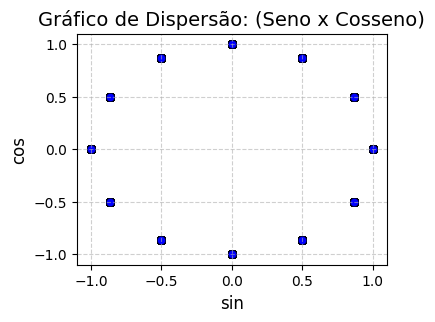

In [ ]:

# Criando o gráfico de dispersão


import matplotlib.pyplot as plt
import seaborn as sns

# Amostragem do DataFrame do PySpark (exemplo: 10% dos dados, ajuste conforme necessário)
df_sample = df.sample(withReplacement=False, fraction=0.1, seed=42)

# Converter o DataFrame amostrado do PySpark para Pandas
df_pandas = df_sample.select("month_of_year_sin", "month_of_year_cos").toPandas()

# Criando o gráfico de dispersão
plt.figure(figsize=(4, 3))
sns.scatterplot(
    x='month_of_year_sin',
    y='month_of_year_cos',
    data=df_pandas,
    color='blue',
    alpha=0.7,
    edgecolor='k'
)
plt.title("Gráfico de Dispersão: (Seno x Cosseno)", fontsize=14)
plt.xlabel("sin", fontsize=12)
plt.ylabel("cos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Train-test split

In [ ]:
# ============ Fazendo o split: predições em dado teste (1 mês) ======================


# Converter a coluna 'order_date' para o tipo timestamp
df = df.withColumn("order_date", F.to_timestamp("order_date", "yyyy-MM-dd"))

# Encontrar o mês mais recente
most_recent_month = df.agg(F.max("order_date")).collect()[0][0]#.to_period('M')

# Filtrar os dados de teste (considerando ano e mês)
test_df = df.filter((F.year(F.col("order_date")) == most_recent_month.year) &
                   (F.month(F.col("order_date")) == most_recent_month.month))

# Filtrar os dados de treinamento (todos os meses anteriores)
train_df = df.filter((F.year(F.col("order_date")) < most_recent_month.year) |
                   ((F.year(F.col("order_date")) == most_recent_month.year) &
                    (F.month(F.col("order_date")) < most_recent_month.month)))

# Verificar se há dados nulos na coluna 'order_date'
if df.filter(F.col("order_date").isNull()).count() > 0:
    print("Há dados nulos na coluna 'order_date'. Considere tratar os dados nulos.")

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {train_df.count()}")
print(f"Tamanho do conjunto de teste: {test_df.count()}")

Tamanho do conjunto de treinamento: 1261677
Tamanho do conjunto de teste: 98347


In [ ]:
num_rows = df.count()          # Conta o número de linhas
num_cols = len(df.columns)     # Conta o número de colunas

print(f"Dimensões do DataFrame: ({num_rows}, {num_cols})")

Dimensões do DataFrame: (1360024, 13)


In [ ]:
# Verificando o split

# Encontrando a data mais antiga e mais recente no conjunto de treinamento
min_date_train = train_df.select(F.min("order_date")).collect()[0][0]
max_date_train = train_df.select(F.max("order_date")).collect()[0][0]

print("Data mais antiga conjunto treino:")
print(min_date_train)
print("Data mais recente conjunto treino:")
print(max_date_train)

print(100*"-")

# Encontrando a data mais antiga e mais recente no conjunto de teste
min_date_test = test_df.select(F.min("order_date")).collect()[0][0]
max_date_test = test_df.select(F.max("order_date")).collect()[0][0]

print("Data mais antiga conjunto teste:")
print(min_date_test)
print("Data mais recente conjunto teste:")
print(max_date_test)

Data mais antiga conjunto treino:
2021-01-04 00:00:00
Data mais recente conjunto treino:
2022-06-30 00:00:00
----------------------------------------------------------------------------------------------------
Data mais antiga conjunto teste:
2022-07-01 00:00:00
Data mais recente conjunto teste:
2022-07-31 00:00:00


In [ ]:
# Verificando intervalo de dias

# Calculando o intervalo de dias para o conjunto de treinamento
max_date_train = train_df.agg(F.max("order_date")).collect()[0][0]
min_date_train = train_df.agg(F.min("order_date")).collect()[0][0]
intervalo_dias_train = (max_date_train - min_date_train).days
print(f"Intervalo de dias do conjunto de treinamento: {intervalo_dias_train}")

# Calculando o intervalo de dias para o conjunto de teste
max_date_test = test_df.agg(F.max("order_date")).collect()[0][0]
min_date_test = test_df.agg(F.min("order_date")).collect()[0][0]
intervalo_dias_test = (max_date_test - min_date_test).days
print(f"Intervalo de dias do conjunto de teste: {intervalo_dias_test}")

Intervalo de dias do conjunto de treinamento: 542
Intervalo de dias do conjunto de teste: 30


In [ ]:
# Verificar proporção do split


# Calculando o número total de linhas
total_rows = df.count()

# Calculando o número de linhas em cada conjunto
train_count = train_df.count()
test_count = test_df.count()

# Calculando as proporções
train_proportion = train_count / total_rows
test_proportion = test_count / total_rows

# Imprimindo os resultados
print('Train-test split:')
print(f'Conjunto treino: {train_proportion:}')
print(f'Conjunto teste: {test_proportion:}')

Train-test split:
Conjunto treino: 0.9276873055181379
Conjunto teste: 0.07231269448186209


In [ ]:
# Separando os índices (account_id e order_date) das features


# Selecionar as colunas de identificadores (account_id e order_date)
train_df_ids = train_df.select("account_id", "order_date")

# Selecionar as colunas de features (todas as colunas exceto account_id e order_date)
train_df = train_df.drop("account_id", "order_date")


# Selecionar as colunas de identificadores (account_id e order_date)
test_df_ids = test_df.select("account_id", "order_date")

# Selecionar as colunas de features (todas as colunas exceto account_id e order_date)
test_df = test_df.drop("account_id", "order_date")

## Model training

In [ ]:
# Modelo baseline


# Criando um vetor de features
assembler = VectorAssembler(inputCols=train_df.columns, outputCol="features")
train_df_vectorized = assembler.transform(train_df)

# Calculando a média da variável alvo
avg_days_of_orders = train_df.select(F.mean("days_of_orders")).collect()[0][0]

# Criando um DataFrame com a previsão constante
predictions_df = train_df_vectorized.withColumn("prediction", F.lit(avg_days_of_orders))

# Arredondando as previsões para o número inteiro mais próximo
predictions_df = predictions_df.withColumn("rounded_prediction", F.round("prediction"))

# Avaliando o MAE (Mean Absolute Error)
evaluator = RegressionEvaluator(metricName="mae", labelCol="days_of_orders", predictionCol="rounded_prediction")
mae_lr = evaluator.evaluate(predictions_df)
print('\nBaseline model:\n')
print(f"MAE do Regressor Linear (previsões arredondadas): {mae_lr}")

# Mostrando as previsões arredondadas
predictions_df.select("days_of_orders", "rounded_prediction").show()


Baseline model:

MAE do Regressor Linear (previsões arredondadas): 1.5760761272496844
+--------------+------------------+
|days_of_orders|rounded_prediction|
+--------------+------------------+
|             3|               3.0|
|             2|               3.0|
|             1|               3.0|
|             2|               3.0|
|             1|               3.0|
|             3|               3.0|
|             2|               3.0|
|             1|               3.0|
|             1|               3.0|
|             2|               3.0|
|             1|               3.0|
|             2|               3.0|
|             1|               3.0|
|             2|               3.0|
|             1|               3.0|
|             2|               3.0|
|             1|               3.0|
|             3|               3.0|
|             2|               3.0|
|             3|               3.0|
+--------------+------------------+
only showing top 20 rows



In [ ]:
# Random Forest

# Criando um vetor de features
assembler = VectorAssembler(inputCols=train_df.columns, outputCol="features")
train_df_vectorized = assembler.transform(train_df)

# Aplicando o modelo de Random Forest Regressor
rf = RandomForestRegressor(featuresCol="features", labelCol="days_of_orders")
model = rf.fit(train_df_vectorized)

# Realizando previsões
predictions = model.transform(train_df_vectorized)

# Arredondando as previsões para o número inteiro mais próximo
predictions = predictions.withColumn("rounded_prediction", F.round("prediction"))

# Avaliando o MAE (Mean Absolute Error) com as previsões arredondadas
evaluator = RegressionEvaluator(metricName="mae", labelCol="days_of_orders", predictionCol="rounded_prediction")
mae_rounded = evaluator.evaluate(predictions)
print('\n Random Forest:\n')
print(f"MAE (Mean Absolute Error) com previsões arredondadas: {mae_rounded}")

# Exibindo previsões arredondadas (opcional)
predictions.select("days_of_orders", "rounded_prediction").show()


 Random Forest:

MAE (Mean Absolute Error) com previsões arredondadas: 0.21555120684612622
+--------------+------------------+
|days_of_orders|rounded_prediction|
+--------------+------------------+
|             3|               3.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               2.0|
|             3|               3.0|
|             2|               2.0|
|             1|               1.0|
|             1|               2.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             2|               3.0|
|             1|               2.0|
|             2|               2.0|
|             1|               1.0|
|             3|               3.0|
|             2|               2.0|
|             3|               3.0|
+--------------+------------------+
only showing top 20 rows



In [ ]:
# Gradient Boosted Tree

# Criando um vetor de features
assembler = VectorAssembler(inputCols=train_df.columns, outputCol="features")
train_df_vectorized = assembler.transform(train_df)

# Aplicando o modelo GBTRegressor
gbt = GBTRegressor(featuresCol="features", labelCol="days_of_orders")
model = gbt.fit(train_df_vectorized)

# Realizando previsões
predictions = model.transform(train_df_vectorized)

# Arredondando as previsões para o número inteiro mais próximo
predictions = predictions.withColumn("rounded_prediction", F.round("prediction"))

# Avaliando o MAE (Mean Absolute Error) com as previsões arredondadas
evaluator = RegressionEvaluator(metricName="mae", labelCol="days_of_orders", predictionCol="rounded_prediction")
mae_rounded = evaluator.evaluate(predictions)
print('\n Gradient Boosted Trees:\n')
print(f"MAE (Mean Absolute Error) com previsões arredondadas: {mae_rounded}")

# Exibindo previsões arredondadas (opcional)
predictions.select("days_of_orders", "rounded_prediction").show()


 Gradient Boosted Trees:

MAE (Mean Absolute Error) com previsões arredondadas: 0.00012602274591674414
+--------------+------------------+
|days_of_orders|rounded_prediction|
+--------------+------------------+
|             3|               3.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             3|               3.0|
|             2|               2.0|
|             1|               1.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             2|               2.0|
|             1|               1.0|
|             3|               3.0|
|             2|               2.0|
|             3|               3.0|
+--------------+------------------+
only showing top 20 rows



In [ ]:
# Juntar as predições com os identificadores

# Adicionar as predições ao DataFrame de identificadores
df_final = df_identificadores.withColumn("prediction", predictions["prediction"])

# Exibir o resultado
df_final.show()

## Predictions in unseen data

In [18]:
# Unique 'account_id':

df_august_with_missing_order_days.select(col("account_id")).distinct().count()

32944

In [10]:
df_august_with_missing_order_days.show(3)

+--------------+----------+------------------+
|    account_id|order_date|transaction_amount|
+--------------+----------+------------------+
|BR_09532176632|2022-08-03|             11.16|
|BR_09532176632|2022-08-03|             32.52|
|BR_09532176632|2022-08-03|              24.9|
+--------------+----------+------------------+
only showing top 3 rows



# Backlog de melhorias

In [ ]:
# ---- Feature engineering -------

# Outras variáveis temporais (dia da semana, dia do mês, etc)

# Conhecimento do negócio


# ---- Feature selection ---------

# Hyperopt, optuna


# ---- Fine tuning de hiperparâmetros

# k-fold temporal

# Hyperopt


# ---- Algorítmos p/ predição ---------

# Prophet

# Regressão de Poisson


# ---- Explicabilidade predições ------

# SHAP




# Rascunhos